In [772]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [773]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sumaterautara.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       357 non-null    float64       
 2   Tx       350 non-null    float64       
 3   Tavg     333 non-null    float64       
 4   RH_avg   333 non-null    float64       
 5   RR       356 non-null    float64       
 6   ss       352 non-null    float64       
 7   ff_x     357 non-null    float64       
 8   ddd_x    356 non-null    float64       
 9   ff_avg   357 non-null    float64       
 10  ddd_car  357 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-773-81b778653c10>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [774]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.0,31.4,1.6,25.6
1,2023-02-01,22.2,29.9,8888.0,26.2
2,2023-03-01,23.5,31.2,0.0,NaN
3,2023-04-01,21.0,30.2,1.3,26.2
4,2023-05-01,22.9,31.3,0.0,27.3
...,...,...,...,...,...
360,2023-12-16,23.6,30.3,0.4,26.2
361,2023-12-17,23.5,33.2,5.5,28.1
362,2023-12-18,23.9,28.5,2.1,25.6
363,2023-12-19,23.0,30.8,5.4,26.9


In [775]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [776]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [777]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [778]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.0,31.4,1.6,25.6
1,31,31,2023-01-02,23.7,30.4,1.1,26.7
2,59,60,2023-01-03,23.4,30.5,15.5,27.0
3,90,92,2023-01-04,23.6,30.4,0.0,NaN
4,120,123,2023-01-05,24.3,33.0,0.0,27.6
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.6,30.3,0.4,26.2
350,350,361,2023-12-17,23.5,33.2,5.5,28.1
351,351,362,2023-12-18,23.9,28.5,2.1,25.6
352,352,363,2023-12-19,23.0,30.8,5.4,26.9


In [779]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          8
Tx         15
RR          9
Tavg       31
dtype: int64

In [780]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       9
dtype: int64

In [781]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

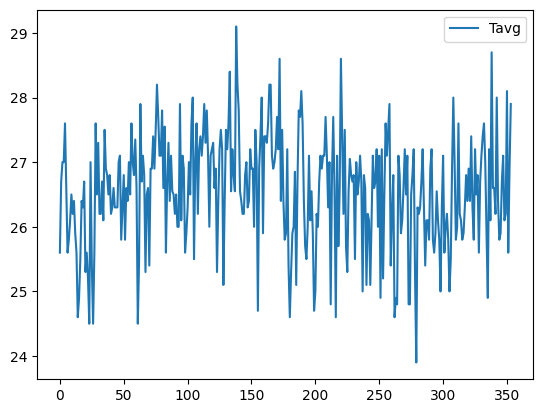

In [782]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

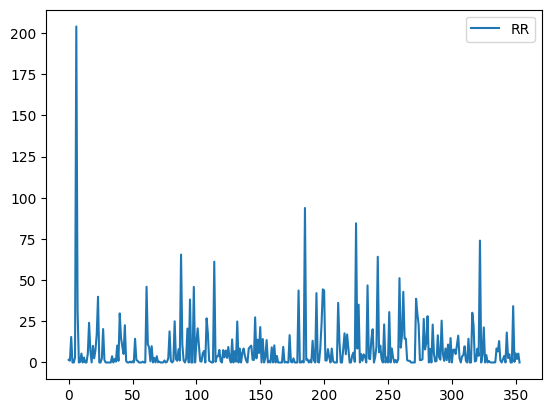

In [783]:
#plotting tavg
df1[['RR']].plot()

In [784]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.0,31.4,1.6,25.6,30.4,26.7,1.1
1,31,31,2023-01-02,23.7,30.4,1.1,26.7,30.5,27.0,15.5
2,59,60,2023-01-03,23.4,30.5,15.5,27.0,30.4,27.0,0.0
3,90,92,2023-01-04,23.6,30.4,0.0,27.0,33.0,27.6,0.0
4,120,123,2023-01-05,24.3,33.0,0.0,27.6,31.2,26.6,3.0
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.6,30.3,0.4,26.2,33.2,28.1,5.5
350,350,361,2023-12-17,23.5,33.2,5.5,28.1,28.5,25.6,2.1
351,351,362,2023-12-18,23.9,28.5,2.1,25.6,30.8,26.9,5.4
352,352,363,2023-12-19,23.0,30.8,5.4,26.9,32.0,27.9,0.0


In [785]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,1.6,25.6,26.7,1.1
1,1.1,26.7,27.0,15.5
2,15.5,27.0,27.0,0.0
3,0.0,27.0,27.6,0.0
4,0.0,27.6,26.6,3.0
...,...,...,...,...
349,0.4,26.2,28.1,5.5
350,5.5,28.1,25.6,2.1
351,2.1,25.6,26.9,5.4
352,5.4,26.9,27.9,0.0


In [786]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,1.6,25.6,26.7,1.1
1,1.1,26.7,27.0,15.5
2,15.5,27.0,27.0,0.0
3,0.0,27.0,27.6,0.0
4,0.0,27.6,26.6,3.0
...,...,...,...,...
348,34.2,26.1,26.2,0.4
349,0.4,26.2,28.1,5.5
350,5.5,28.1,25.6,2.1
351,2.1,25.6,26.9,5.4


In [787]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [788]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,1.6,25.6,26.7,1.1,0
1,1.1,26.7,27.0,15.5,1
2,15.5,27.0,27.0,0.0,2
3,0.0,27.0,27.6,0.0,3
4,0.0,27.6,26.6,3.0,4
...,...,...,...,...,...
348,34.2,26.1,26.2,0.4,348
349,0.4,26.2,28.1,5.5,349
350,5.5,28.1,25.6,2.1,350
351,2.1,25.6,26.9,5.4,351


In [789]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [790]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [791]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [792]:
X_test

,Indeks,Tavg
282,282,26.3
283,283,26.7
284,284,27.2
285,285,26.3
286,286,25.4
...,...,...
348,348,26.1
349,349,26.2
350,350,28.1
351,351,25.6


In [793]:
#testing
pred1 = lr.predict(X_test)
pred1

array([26.44814957, 26.57366377, 26.73063111, 26.44725444, 26.16387776,
       26.38375139, 26.38345302, 26.28879521, 26.63448141, 26.72854247,
       26.28790007, 26.22469541, 26.31875646, 26.52276677, 26.381066  ,
       26.28640819, 26.03448466, 26.44307715, 26.69440392, 26.22230839,
       26.34782259, 26.4104305 , 26.28431954, 26.03239602, 26.18936336,
       26.62940899, 26.9750952 , 26.66026538, 26.28252928, 26.34513719,
       26.84808911, 26.40744672, 26.3756952 , 26.28103739, 26.31219216,
       26.43770636, 26.5946737 , 26.46856275, 26.62553009, 26.46796599,
       26.78219905, 26.43591609, 26.27835199, 26.71839763, 26.49792725,
       26.5919883 , 26.2142522 , 26.5599384 , 26.6854526 , 26.77951365,
       26.84212156, 26.65310432, 26.30682136, 25.99199155, 26.71511548,
       26.36883252, 27.18631588, 26.52550148, 26.52520311, 26.39909215,
       26.96495036, 26.46140169, 26.27238444, 26.30353921, 26.55486598,
       26.68038018, 26.36555037, 26.39670513, 26.99401649, 26.20

In [794]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.6457280467395256 0.6128420878546512


In [795]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,26.3
283,283,26.7
284,284,27.2
285,285,26.3
286,286,25.4
...,...,...
348,348,26.1
349,349,26.2
350,350,28.1
351,351,25.6


In [796]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,26.448150
283,26.573664
284,26.730631
285,26.447254
286,26.163878
...,...
348,26.365550
349,26.396705
350,26.994016


In [797]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-797-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,25.6,NaN
1,26.7,NaN
2,27.0,NaN
3,27.0,NaN
4,27.6,NaN
...,...,...
348,26.1,26.365550
349,26.2,26.396705
350,28.1,26.994016
351,25.6,26.207390


<Axes: >

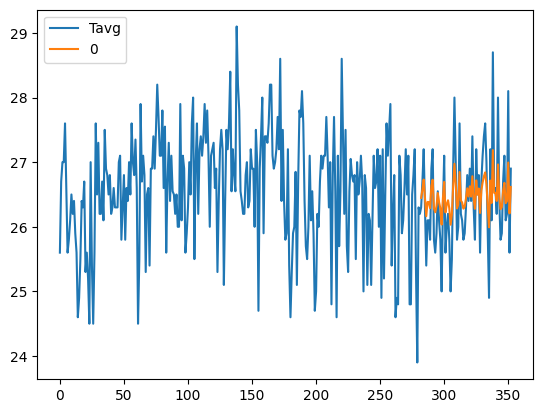

In [798]:
kan.plot()

In [799]:
new_data = [[354, 26.9],[355,26.9],[356,26.9],[357,26.9],[358,26.9],[359,26.9],[360,26.9]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.61538525, 26.61508687, 26.6147885 , 26.61449012, 26.61419174,
       26.61389336, 26.61359499])

In [801]:
kan.to_json('Prediksi Sumatera Utara.json')